In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from my_func import calc_T_moistadiabat, calc_eps, calc_ILWR


In [2]:
AVD_all = pd.read_csv('raw_data/Adventdalen_Hour.dat', 
	skiprows = [0,2,3],index_col = 0,parse_dates = True, na_values = 'NAN', header = 0 ,
	names = ['TIMESTAMP','RECORD','ID','T2m_PT1000_Max','T2m_PT1000_Min','T2m_PT1000_Avg',
	'T10m_PT1000_Max','T10m_PT1000_Min','T10m_PT1000_Avg',
	'T2m_Rotron_Max','T2m_Rotron_Min','T2m_Rotron_Avg',
	'LF2m_Rotron_Max','LF2m_Rotron_Avg','T10m_Rotron_Max',
	'T10m_Rotron_Min', 'T10m_Rotron_Avg', 'LF10m_Rotron_Max',
	'LF10m_Rotron_Avg','P_mbar','ff2m_mps_Max','ff2m_10min',
	'ff2m_mps_avg', 'dd2m', 'ff10m_sek_Max', 'ff10m_10min',
	'ff10m_mps_Avg','dd10m','Batt_V_Min'])

In [3]:
GF_all = pd.read_csv('raw_data/Gruvefjellet_Res_data.dat', 
	skiprows = [0,2,3], index_col = 0,parse_dates = True, na_values = 'NAN', header = 0 ,
	names = ['TIMESTAMP','RECORD','ID','T10cm_minutt_Max','T10cm_minutt_Min','T10cm_minutt_Avg',
	'T1m_minutt_Max','T1m_minutt_Min','T1m_minutt_Avg',
	'T3m_minutt_Max','T3m_minutt_Min','T3m_minutt_Avg',
	'LF_minutt_Max','LF_minutt_Avg','P_mbar','ff_mps_Max','ff_10min',
	'ff_mps_avg', 'dd','NB_time','SD_m','SD_kval','TSS','T_soil_1m',
	'T_soil_2m','T_soil_3m','T_soil_4m','T_soil_5m','T_soil_6m',
	'R_surf_ohm','R_1m_ohm', 'R_2m_ohm', 'R_3m_ohm', 'R_4m_ohm',
	'R_5m_ohm', 'R_6m_ohm', 'Batt_V_Min'])

In [4]:
AVD_rad_all = pd.read_csv('raw_data/Adventdalen_New_Fem_minutt.dat', 
    skiprows = [0,2,3],index_col = 0, parse_dates = True, na_values = 'NAN',header = 0,
    names = ['TIMESTAMP','RECORD','SWin_Wpm2','LWin_Wpm2','SWout_Wpm2','LWout_Wpm2','CNR1_temp_gr_C_Avg'])

AVD_rad_data = pd.DataFrame.from_items([
    ('SWin_Wpm2',AVD_rad_all['SWin_Wpm2'].resample('H').mean().shift(1)), #opp..upward looking instrument measuring SW down
    ('SWout_Wpm2', AVD_rad_all['SWout_Wpm2'].resample('H').mean().shift(1)), #ned..downward looking instrument measuring SW up
    ('LWin_Wpm2', AVD_rad_all['LWin_Wpm2'].resample('H').mean().shift(1)),
    ('LWout_Wpm2', AVD_rad_all['LWout_Wpm2'].resample('H').mean().shift(1))])

/home/user/.conda/envs/MA/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  if __name__ == '__main__':


In [5]:
#GF_data = GF_all['2016-08-01 00:00:00':'2017-03-31 23:00:00']
#AVD_data = AVD_all['2016-08-01 00:00:00':'2017-03-31 23:00:00']
#AVD_rad_data = AVD_rad_data['2016-08-01 00:00:00':'2017-03-31 23:00:00'] 

GF_data = GF_all['2016-08-01 00:00:00':'2017-04-03 00:00:00']
AVD_data = AVD_all['2016-08-01 00:00:00':'2017-04-03 00:00:00']
AVD_rad_data = AVD_rad_data['2016-08-01 00:00:00':'2017-04-03 00:00:00'] 



GF/AVD Summary, whole season: count    5881.000000
mean       -0.003740
std         0.006025
min        -0.012405
25%        -0.007900
50%        -0.005942
75%        -0.001699
max         0.024187
dtype: float64
GF/AVD Summary, daily avg: count    246.000000
mean      -0.003720
std        0.005173
min       -0.009256
25%       -0.007367
50%       -0.005448
75%       -0.001984
max        0.020344
dtype: float64
GF/AVD Summary, monthly avg:
 count    9.000000
mean    -0.002752
std      0.003882
min     -0.007458
25%     -0.005619
50%     -0.002609
75%     -0.001278
max      0.005740
dtype: float64
TIMESTAMP
2016-08-31   -0.007458
2016-09-30   -0.004348
2016-10-31   -0.005619
2016-11-30   -0.005878
2016-12-31   -0.002609
2017-01-31   -0.001278
2017-02-28   -0.002430
2017-03-31   -0.000885
2017-04-30    0.005740
Freq: M, dtype: float64


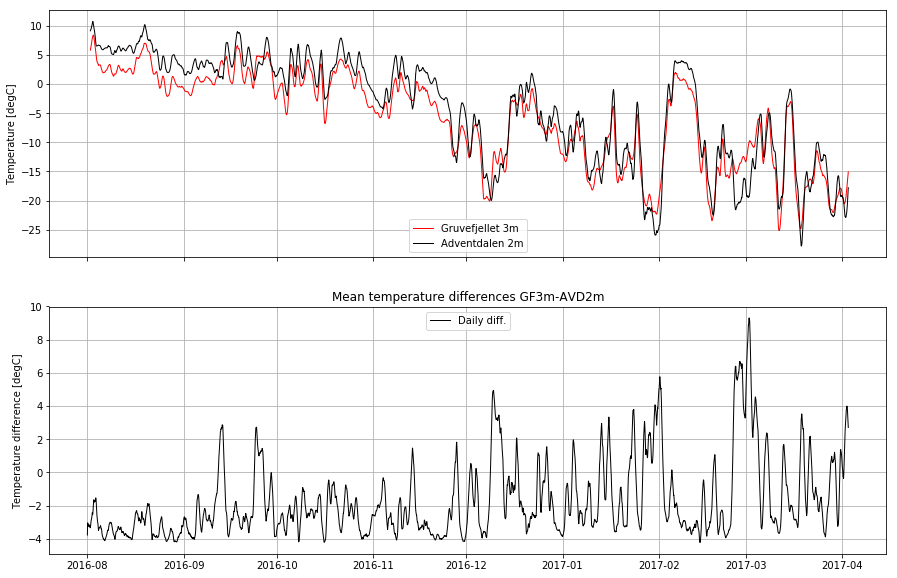

In [6]:

f9, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (15,10), sharex=True,
                             sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None)
ax1.plot(GF_data.index, GF_data.T3m_minutt_Avg.rolling(window=24).mean(),
         color = 'r', linewidth = 1, label = 'Gruvefjellet 3m')
ax1.plot(AVD_data.index, AVD_data.T2m_Rotron_Avg.rolling(window=24).mean(),
         color = 'k', linewidth = 1, label = 'Adventdalen 2m')
ax1.grid()
ax1.set_ylabel('Temperature [degC]')
ax1.legend(loc = 'lower center')


ax2.plot((GF_data.T3m_minutt_Avg - AVD_data.T2m_Rotron_Avg).rolling('24H').mean(),
         color = 'k',label = 'Daily diff.', linewidth = 1)
ax2.grid()
# ax2.set_xlabel('Time')
ax2.set_ylabel('Temperature difference [degC]')
ax2.legend(loc = 'upper center')
ax2.set_title('Mean temperature differences GF3m-AVD2m')

#calculate temperature gradient per m
gradT = ((GF_data.T3m_minutt_Avg + 273.15)- (AVD_data.T2m_Rotron_Avg + 273.15))/(464-15)
# print(gradT)
print('GF/AVD Summary, whole season:', gradT.describe())
gradT_davg = gradT.resample('D').mean()
print('GF/AVD Summary, daily avg:', gradT_davg.describe())
gradT_mavg = gradT.resample('M').mean()
print('GF/AVD Summary, monthly avg:\n', gradT_mavg.describe())
print(gradT_mavg)

# gradT_havg = gradT.groupby(gradT.index.hour)
# plt.plot
# print('GF/AVD Summary, hourly avg:\n', gradT_havg.describe())





Text(-33, 13, 'R =0.96')

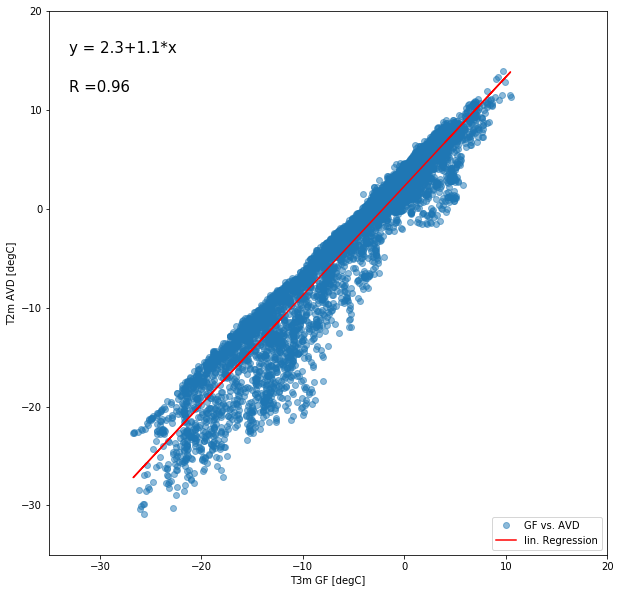

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(GF_data.T3m_minutt_Avg, AVD_data.T2m_Rotron_Avg)
f11, ax1 = plt.subplots(nrows = 1, ncols =1, figsize = (10,10))
ax1.plot(GF_data.T3m_minutt_Avg, AVD_data.T2m_Rotron_Avg, 'o', label='GF vs. AVD', alpha =0.5)
ax1.plot(GF_data.T3m_minutt_Avg, intercept + slope*GF_data.T3m_minutt_Avg, 'r', label='lin. Regression')
ax1.legend(loc ='lower right')
ax1.set_xlabel('T3m GF [degC]')
ax1.set_ylabel('T2m AVD [degC]')
ax1.set_xlim(-35,20)
ax1.set_ylim(-35,20)
plt.text(-33, 17, 'y = '+str(intercept.round(2))+'+'+str(slope.round(2))+'*x' ,
         verticalalignment='top', horizontalalignment='left', fontsize = 15)
plt.text(-33, 13, 'R ='+str(r_value.round(2)) ,
         verticalalignment='top',horizontalalignment='left', fontsize = 15)


GF/AVD Summary, whole season: count    5881.000000
mean        0.011969
std         0.017169
min        -0.086102
25%         0.003563
50%         0.013586
75%         0.022606
max         0.084209
dtype: float64
GF/AVD Summary, daily avg: count    246.000000
mean       0.011967
std        0.012350
min       -0.042515
25%        0.005980
50%        0.013268
75%        0.019733
max        0.043569
dtype: float64


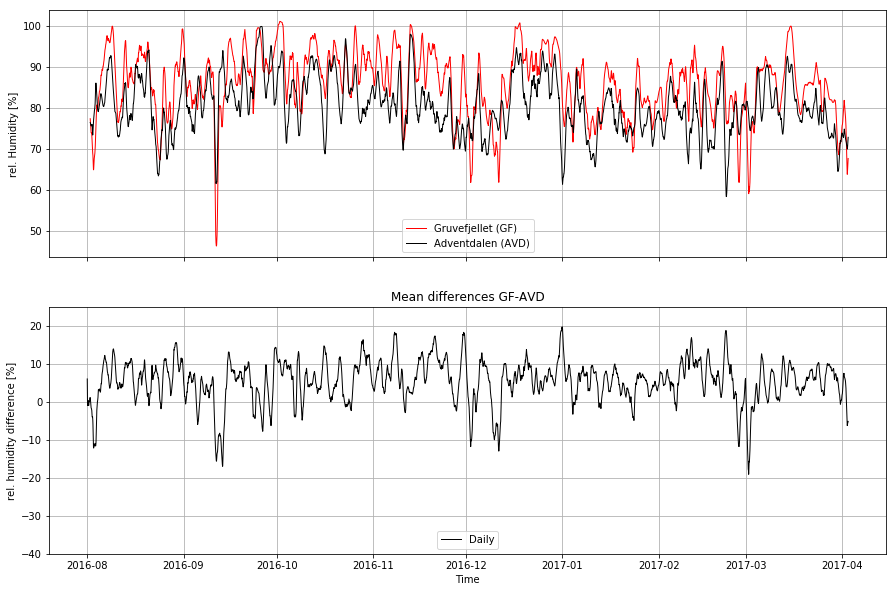

In [8]:
f3, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (15,10), sharex=True, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None)
ax1.plot(GF_data.index, GF_data.LF_minutt_Avg.rolling(window=24).mean(), color = 'r',
         linewidth = 1, label = 'Gruvefjellet (GF)')
ax1.plot(GF_data.index, AVD_data.LF2m_Rotron_Avg.rolling(window=24).mean(), color = 'k',
         linewidth = 1, label = 'Adventdalen (AVD)')
# ax1.set_ylim(30,105)
ax1.grid()
ax1.set_ylabel('rel. Humidity [%]')
ax1.legend(loc = 'lower center')
# ax1.set_title('24h Rolling mean')
ax2.plot((GF_data.LF_minutt_Avg - AVD_data.LF2m_Rotron_Avg).rolling('24H').mean(),
         color = 'k',label = 'Daily', linewidth = 1)
# ax2.plot(mavg_diff, color = 'r',label = 'Monthly', linewidth = 2)
# ax2.plot(yavg_diff, color = 'b', label = 'Yearly', linewidth = 2)
ax2.grid()
ax2.set_ylim(-40,25)
ax2.set_xlabel('Time')
ax2.set_ylabel('rel. humidity difference [%]')
ax2.legend(loc = 'lower center')
ax2.set_title('Mean differences GF-AVD')
f3.savefig('figures/RH_meanDiff.png', bbox_inches='tight')

gradRH = ((GF_data.LF_minutt_Avg)- (AVD_data.LF2m_Rotron_Avg))/(464-15)
print('GF/AVD Summary, whole season:', gradRH.describe())
gradRH_davg = gradRH.resample('D').mean()
print('GF/AVD Summary, daily avg:', gradRH_davg.describe())



Text(37, 95, 'R =0.66')

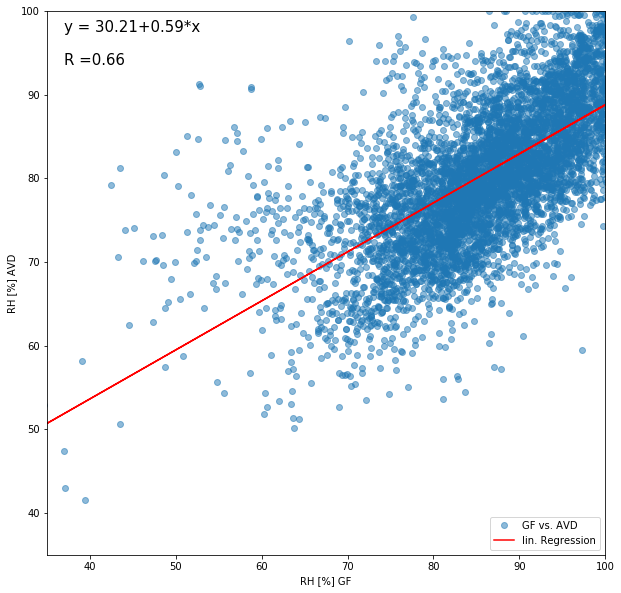

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(GF_data.LF_minutt_Avg, AVD_data.LF2m_Rotron_Avg)
f4, ax1 = plt.subplots(nrows = 1, ncols =1, figsize = (10,10))
ax1.plot(GF_data.LF_minutt_Avg, AVD_data.LF2m_Rotron_Avg, 'o', label='GF vs. AVD', alpha =0.5)
ax1.plot(GF_data.LF_minutt_Avg, intercept + slope*GF_data.LF_minutt_Avg, 'r', label='lin. Regression')
ax1.legend(loc ='lower right')
ax1.set_xlabel('RH [%] GF')
ax1.set_ylabel('RH [%] AVD')
ax1.set_xlim(35,100)
ax1.set_ylim(35,100)
plt.text(37, 99, 'y = '+str(intercept.round(2))+'+'+str(slope.round(2))+'*x' ,verticalalignment='top', horizontalalignment='left', fontsize = 15)
plt.text(37, 95, 'R ='+str(r_value.round(2)) ,verticalalignment='top', horizontalalignment='left', fontsize = 15)

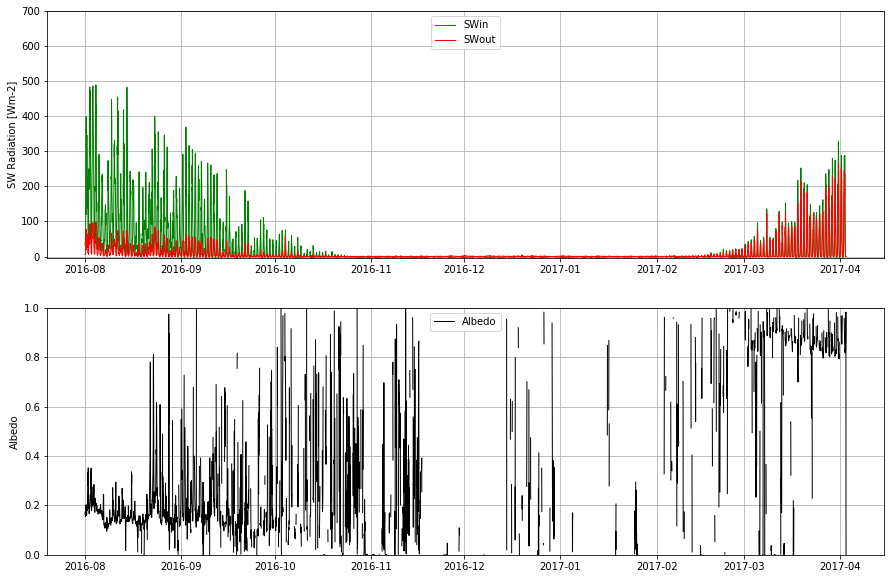

In [10]:
f5, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize= (15,10))
ax1.plot(AVD_rad_data.index, AVD_rad_data.SWin_Wpm2, color = 'g', linewidth = 1, label = 'SWin')
ax1.plot(AVD_rad_data.index, AVD_rad_data.SWout_Wpm2, color = 'r', linewidth = 1, label = 'SWout')
ax1.set_ylim(-5,700)
ax1.grid()
ax1.set_ylabel('SW Radiation [Wm-2]')
ax1.legend(loc = 'upper center')
albedo = AVD_rad_data.SWout_Wpm2/AVD_rad_data.SWin_Wpm2

for i in range(0, len(AVD_rad_data.index)):
	if np.logical_or(albedo[i]>1,albedo[i]<0):
		albedo[i] = np.NaN 

ax2.plot(AVD_rad_data.index,albedo,color = 'k', linewidth = 1, label = 'Albedo')
ax2.set_ylim(0,1)
ax2.grid()
ax2.set_ylabel('Albedo')
ax2.legend(loc = 'upper center')

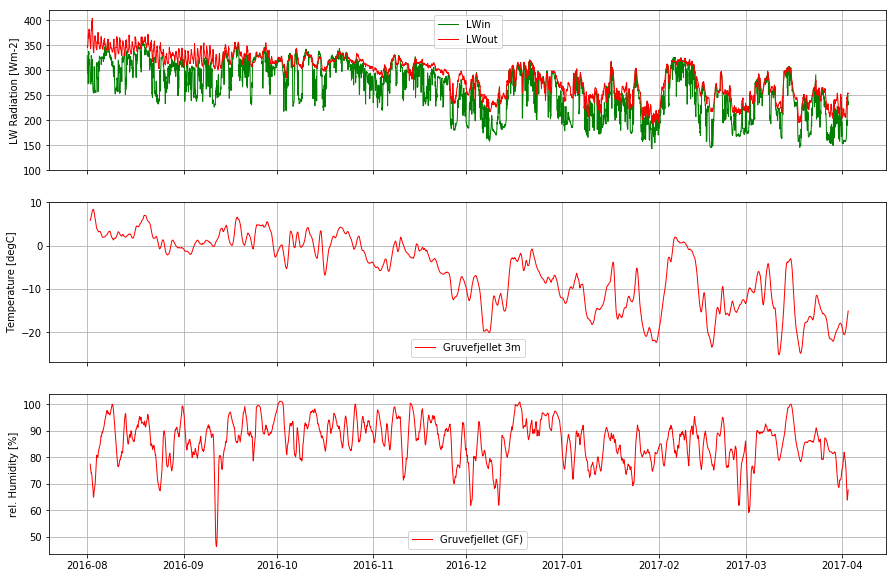

In [11]:
f9, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (15,10), sharex=True,
                             sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None)
ax1.plot(AVD_rad_data.index, AVD_rad_data.LWin_Wpm2, color = 'g', linewidth = 1, label = 'LWin')
ax1.plot(AVD_rad_data.index, AVD_rad_data.LWout_Wpm2, color = 'r', linewidth = 1, label = 'LWout')
ax1.set_ylim(100,420)
ax1.grid()
ax1.set_ylabel('LW Radiation [Wm-2]')
ax1.legend(loc = 'upper center')


ax2.plot(GF_data.index, GF_data.T3m_minutt_Avg.rolling(window=24).mean(),
         color = 'r', linewidth = 1, label = 'Gruvefjellet 3m')
# ax2.plot(AVD_data.index, AVD_data.T2m_Rotron_Avg.rolling(window=24).mean(),
#          color = 'k', linewidth = 1, label = 'Adventdalen 2m')
ax2.grid()
ax2.set_ylabel('Temperature [degC]')
ax2.legend(loc = 'lower center')

ax3.plot(GF_data.index, GF_data.LF_minutt_Avg.rolling(window=24).mean(), color = 'r',
         linewidth = 1, label = 'Gruvefjellet (GF)')
# ax3.plot(GF_data.index, AVD_data.LF2m_Rotron_Avg.rolling(window=24).mean(), color = 'k',
#          linewidth = 1, label = 'Adventdalen (AVD)')
# ax1.set_ylim(30,105)
ax3.grid()
ax3.set_ylabel('rel. Humidity [%]')
ax3.legend(loc = 'lower center')



Text(1, 20, 'R =0.64')

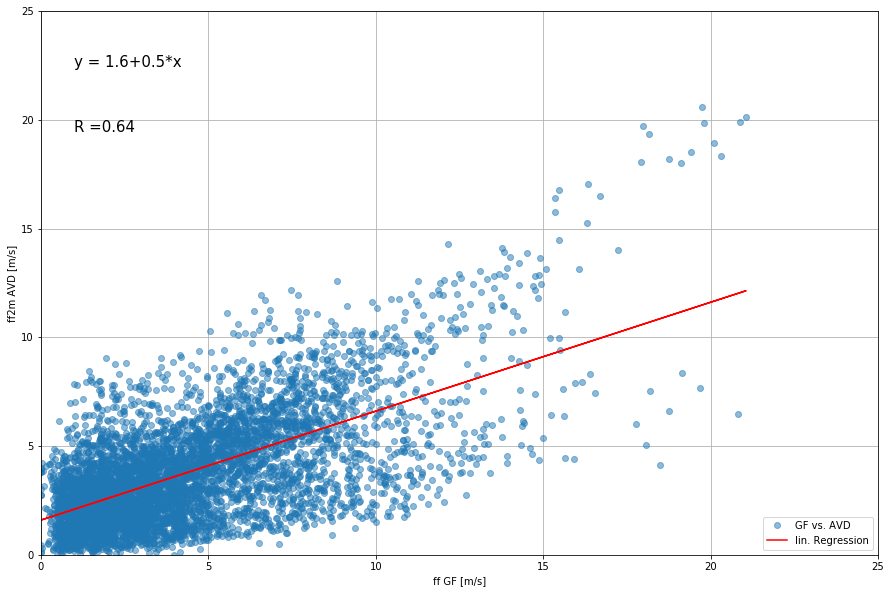

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(GF_data.ff_mps_avg, AVD_data.ff2m_mps_avg)
f13, ax1 = plt.subplots(nrows = 1, ncols =1, figsize = (15,10))
ax1.plot(GF_data.ff_mps_avg, AVD_data.ff2m_mps_avg, 'o', label='GF vs. AVD', alpha =0.5)
ax1.plot(GF_data.ff_mps_avg, intercept + slope*GF_data.ff_mps_avg, 'r', label='lin. Regression')
ax1.legend(loc ='lower right')
ax1.set_xlabel('ff GF [m/s]')
ax1.set_ylabel('ff2m AVD [m/s]')
ax1.set_xlim(0,25)
ax1.set_ylim(0,25)
ax1.grid()
plt.text(1, 23, 'y = '+str(intercept.round(2))+'+'+str(slope.round(2))+'*x' ,verticalalignment='top', horizontalalignment='left', fontsize = 15)
plt.text(1, 20, 'R ='+str(r_value.round(2)) ,verticalalignment='top', horizontalalignment='left', fontsize = 15)


In [13]:
# Calculate LWIN at AVD with adjusted temperature
dh = 464-15 # height difference AVD GF
sigma = 5.67*10**(-8)  #[Wm^(-2)K^(-4)] Stefan-Boltzmann constant
newT_AVD = GF_data.T3m_minutt_Avg + 0.0065*dh # calculate T at AVD using moist adiabat temperature gradient
# print(GF_data.T3m_minutt_Avg, newT_AVD, max(newT_AVD), min(newT_AVD))
eps = AVD_rad_data.LWin_Wpm2/(sigma*(AVD_data.T2m_Rotron_Avg+273.15)**4)# Calculate eps.. emissivity of the sky, from original Data at AVD
# print(eps[eps>1].count())
# print(eps[eps>1])
eps[eps>1] = np.NaN
# print(eps, max(eps), min(eps))
newLWIN_AVD = sigma*eps*(newT_AVD+273.15)**4 

Text(0.5, 1.0, 'Mean differences AVD - new')

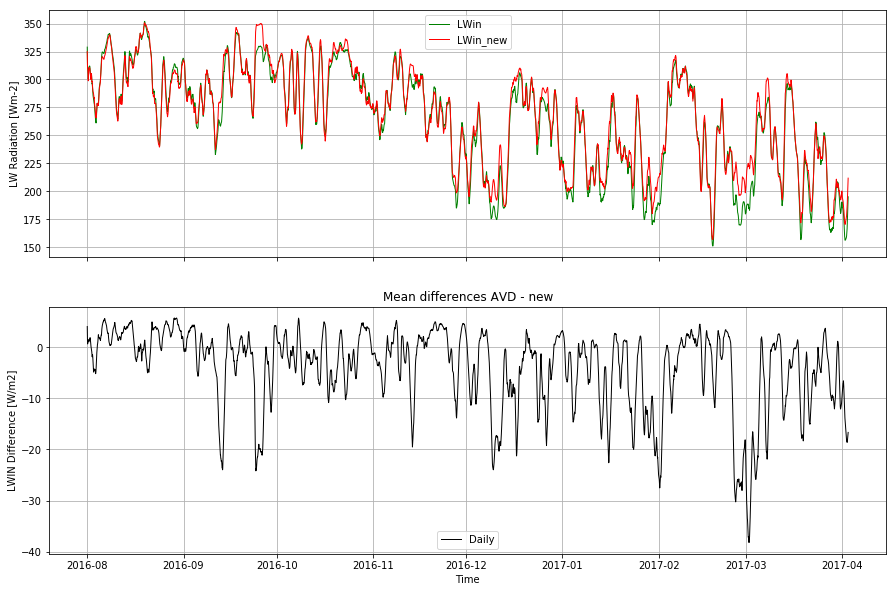

In [14]:
f9, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (15,10), sharex=True,
                             sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None)
ax1.plot(AVD_rad_data.index, AVD_rad_data.LWin_Wpm2.rolling('24H').mean(), color = 'g', linewidth = 1, label = 'LWin')
ax1.plot(AVD_rad_data.index, newLWIN_AVD.rolling('24H').mean(), color = 'r', linewidth = 1, label = 'LWin_new')
# ax1.set_ylim(0,700)
ax1.grid()
ax1.set_ylabel('LW Radiation [Wm-2]')
ax1.legend(loc = 'upper center')

ax2.plot((AVD_rad_data.LWin_Wpm2 - newLWIN_AVD).rolling('24H').mean(),
         color = 'k',label = 'Daily', linewidth = 1)
# ax2.plot(mavg_diff, color = 'r',label = 'Monthly', linewidth = 2)
# ax2.plot(yavg_diff, color = 'b', label = 'Yearly', linewidth = 2)
ax2.grid()
# ax2.set_ylim(-40,25)
ax2.set_xlabel('Time')
ax2.set_ylabel('LWIN Difference [W/m2]')
ax2.legend(loc = 'lower center')
ax2.set_title('Mean differences AVD - new')


Text(150, 340, 'R =0.98')

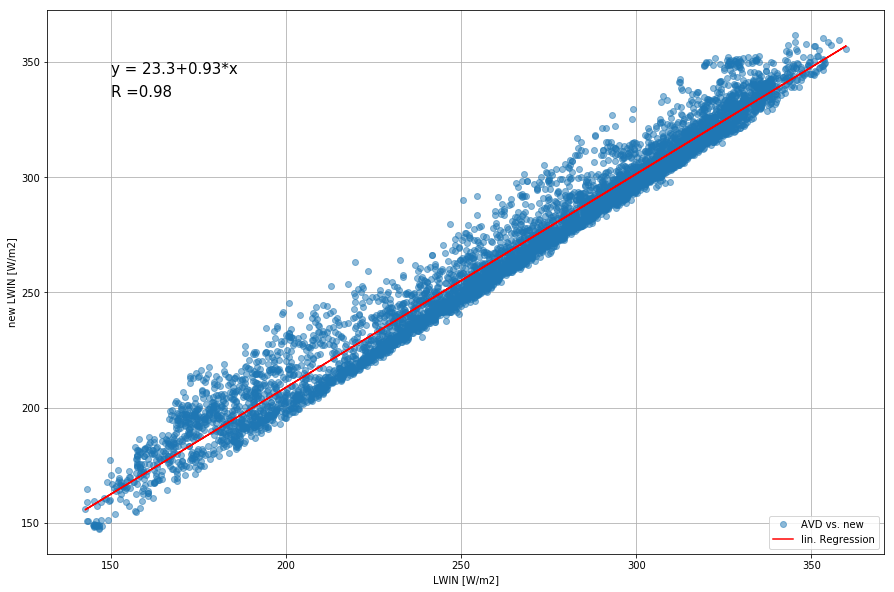

In [15]:
mask = ~np.isnan(AVD_rad_data.LWin_Wpm2) & ~np.isnan(newLWIN_AVD)
slope, intercept, r_value, p_value, std_err = stats.linregress(AVD_rad_data.LWin_Wpm2[mask],newLWIN_AVD[mask])
f13, ax1 = plt.subplots(nrows = 1, ncols =1, figsize = (15,10))
ax1.plot(AVD_rad_data.LWin_Wpm2[mask], newLWIN_AVD[mask], 'o', label='AVD vs. new', alpha =0.5)
ax1.plot(AVD_rad_data.LWin_Wpm2[mask], intercept + slope*AVD_rad_data.LWin_Wpm2[mask], 'r', label='lin. Regression')
ax1.legend(loc ='lower right')
ax1.set_xlabel('LWIN [W/m2]')
ax1.set_ylabel('new LWIN [W/m2]')
# ax1.set_xlim(0,25)
# ax1.set_ylim(0,25)
ax1.grid()
plt.text(150, 350, 'y = '+str(intercept.round(2))+'+'+str(slope.round(2))+'*x' ,verticalalignment='top', horizontalalignment='left', fontsize = 15)
plt.text(150, 340, 'R ='+str(r_value.round(2)) ,verticalalignment='top', horizontalalignment='left', fontsize = 15)